# Bioinformatics and Lab I — Environment Setup for the Term Project

```
Bioinformatics and Lab I
Interdisciplinary Program in Bioinformatics / School of Biological Sciences, Seoul National University
Spring 2025

This notebook may be reused under the terms of the Creative Commons BY‑SA license.
Hyeshik Chang <hyeshik@snu.ac.kr>, School of Biological Sciences, SNU
```

This notebook prepares the environment so you can carry out the Term Project on **Google Colab**. If you are using your own computer or a lab workstation instead of Colab, first install the required software and then open this notebook inside that environment. If Colab misbehaves (e.g. packages won’t install or the kernel crashes), try **`Runtime → Disconnect and delete runtime`** and start again.

If you’d like an easier way to browse files and directories inside Colab, click the folder icon at the very bottom of the left‑hand sidebar.

When you run **`Runtime → Run all`**, network commands such as `wget` or `rsync` can occasionally fail. Simply re‑running the cell will usually fix the problem. I’ve added short notes before or after the affected cells—please read them if you run into errors.


## Mount Google Drive

We will connect Google Drive so we can load and save data files. **This time you’ll need to edit the script file …** (If you are working on your own computer or a lab workstation with enough local storage, you can skip this step.)


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Install the Bioconda environment for the practical

If you are *not* using Google Colab—e.g., you are on your own computer or a lab workstation—set up a local [Bioconda](https://bioconda.github.io/) environment and open this notebook inside it.

For Colab users the following commands will create a [Bioconda] environment that contains all the tools needed for the practical. Watch the output; if something looks like an error, read it carefully and fix the problem.

Because Colab’s Python interpreter cannot be replaced, Python packages installed with Conda won’t be visible. Install Python modules with `pip` instead.

The initialization scripts live in the [GitHub project](https://github.com/hyeshik/colab-biolab).


In [8]:
!git clone https://github.com/hyeshik/colab-biolab.git
!cd colab-biolab && bash tools/setup.sh
exec(open('colab-biolab/tools/activate_conda.py').read())

Cloning into 'colab-biolab'...
remote: Enumerating objects: 76, done.
remote: Counting objects: 100% (76/76), done.
remote: Compressing objects: 100% (47/47), done.
remote: Total 76 (delta 26), reused 59 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (76/76), 318.16 KiB | 3.15 MiB/s, done.
Resolving deltas: 100% (26/26), done.
./
./root/
./root/.profile
./root/.vimrc
./root/.condarc
./root/.tmux.conf
./root/.bin.priority/
./root/.bin.priority/pip2
./root/.bin.priority/pip
./root/.bin.priority/pip3
./root/.bashrc.biolab
--2025-05-07 01:15:38--  https://repo.anaconda.com/miniconda/Miniconda3-latest-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.191.158, 104.16.32.241, 2606:4700::6810:20f1, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.191.158|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 155472915 (148M) [application/octet-stream]
Saving to: ‘miniconda3.sh’

miniconda3.sh       100%[===================>] 

In Google Colab you can run shell commands by prefixing them with `!`.


## Download the sequencing data

Let’s download the sequencing data needed for the practical. As long as you have enough Drive space you can keep the data between sessions. The data will be extracted to `/content/drive/MyDrive/binfo1-datapack1`.

### (Option 1) When working in Google Colab
1. Open the [shared Google Drive folder](https://drive.google.com/drive/folders/1QBJednh-C7A17PFOlpZHBKyDmBvd6klh?usp=sharing).
2. Click the ▾ next to the title “binfo1‑datapack1”.
3. Choose **Organize → Add shortcut to Drive**.
4. Select *My Drive* and press **ADD SHORTCUT**.
5. Run the next cell to verify that the shortcut is recognised (if not, wait 3–5 minutes and try again).
6. If everything looks good, continue to the next step.


In [11]:
!ls -al /content/drive/MyDrive/binfo1-datapack1/

total 7162852
-r-------- 1 root root 1370036258 Apr 27  2023 CLIP-35L33G.bam
-r-------- 1 root root    3118336 Apr 27  2023 CLIP-35L33G.bam.bai
-r-------- 1 root root       7113 May 11  2023 CLIP-let7g.bam
-r-------- 1 root root      14561 May 11  2023 CLIP-let7g-gene.pileup
-r-------- 1 root root    2685065 May 11  2023 CLIP-let7g.pileup
-r-------- 1 root root  883334756 Apr 27  2023 gencode.gtf
-r-------- 1 root root   24065406 Apr 27  2023 read-counts.txt
-r-------- 1 root root        751 Apr 27  2023 read-counts.txt.summary
-r-------- 1 root root 1003658801 Apr 27  2023 RNA-control.bam
-r-------- 1 root root    2276104 Apr 27  2023 RNA-control.bam.bai
-r-------- 1 root root 1260991122 Apr 27  2023 RNA-siLin28a.bam
-r-------- 1 root root    2710744 Apr 27  2023 RNA-siLin28a.bam.bai
-r-------- 1 root root  981684502 Apr 27  2023 RNA-siLuc.bam
-r-------- 1 root root    2606104 Apr 27  2023 RNA-siLuc.bam.bai
-r-------- 1 root root  737352902 Apr 27  2023 RPF-siLin28a.bam
-r-------- 1 r

### (Option 2) When you are *not* on Colab

If you are working on your own computer or a lab workstation, download the data with the following command.

`wget` often fails on the first try; if that happens just run it again. Replace `/content/drive/MyDrive` with the destination path you prefer.


In [4]:
!wget -O - --no-check-certificate https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar | tar -C /content/drive/MyDrive -xf -

--2025-05-06 19:52:37--  https://hyeshik.qbio.io/binfo/binfo1-datapack1.tar
Resolving hyeshik.qbio.io (hyeshik.qbio.io)... 147.47.203.129
Connecting to hyeshik.qbio.io (hyeshik.qbio.io)|147.47.203.129|:443... connected.
Unable to establish SSL connection.
tar: This does not look like a tar archive
tar: Exiting with failure status due to previous errors


Next, download the **GENCODE** annotation files in advance and save them. If you get an error, simply run the command again.


In [5]:
!wget --no-check-certificate -O /content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz http://ftp.ebi.ac.uk/pub/databases/gencode/Gencode_mouse/release_M27/gencode.vM27.annotation.gtf.gz

/content/drive/MyDrive/binfo1-datapack1/gencode.gtf.gz: Read-only file system


### Verify file checksums

Check the MD5 checksums of the downloaded data. This will take a while. The original checksums are shown below; compare them with your results (if you prefer you can use `md5sum -c`, but let’s do it manually this time to get used to MD5).

```
140aaf30bcb9276cc716f8699f04ddd6  CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  CLIP-35L33G.bam.bai
328883a73d507eafbf5b60bd6b906201  RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  RNA-siLin28a.bam
fef112c727244060ea62d3f2564a07f6  RNA-siLin28a.bam.bai
28bbd0c47d725669340c784f1b772c01  RNA-siLuc.bam
43590fdc4d81905c0432e0d1cb8cfd5b  RNA-siLuc.bam.bai
5c08a9297307bc83259e658c4474f0cc  RPF-siLin28a.bam
a1bb3e29be412dfd7fd8d16b1b1acc4c  RPF-siLin28a.bam.bai
f2eebf50943024d0116c9cd3e744c707  RPF-siLuc.bam
dc24f69e8f571fc8be30f28ce5b84fcd  RPF-siLuc.bam.bai
```


In [7]:
!md5sum /content/drive/MyDrive/binfo1-datapack1/*

140aaf30bcb9276cc716f8699f04ddd6  /content/drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam
f1b3336ed7e2f97d562dcc71641251bd  /content/drive/MyDrive/binfo1-datapack1/CLIP-35L33G.bam.bai
5d0265965487c33475f48869fc9df2d2  /content/drive/MyDrive/binfo1-datapack1/CLIP-let7g.bam
4ea14471c5d4bf9ab1fd91b9a5b2193c  /content/drive/MyDrive/binfo1-datapack1/CLIP-let7g-gene.pileup
a53f66a5575d4ac2d3b4c44af576d44d  /content/drive/MyDrive/binfo1-datapack1/CLIP-let7g.pileup
d54d428f5872030c4ffc43058709b896  /content/drive/MyDrive/binfo1-datapack1/gencode.gtf
2698e6c8e30005ebc0593d3b9e9b5c58  /content/drive/MyDrive/binfo1-datapack1/read-counts.txt
7c9528c08ed2f1ae6e2de599db1aa8fb  /content/drive/MyDrive/binfo1-datapack1/read-counts.txt.summary
328883a73d507eafbf5b60bd6b906201  /content/drive/MyDrive/binfo1-datapack1/RNA-control.bam
02073818e2f398a73c3b76e5169de1ca  /content/drive/MyDrive/binfo1-datapack1/RNA-control.bam.bai
b09550d09d6c2a4ce27f0226f426fdb1  /content/drive/MyDrive/binfo1-datapack1/RNA-si

In [6]:
!ls -al /content/drive/MyDrive/binfo*

ls: /content/drive/MyDrive/binfo1-datapack1: No such file or directory
lrw------- 1 root root    0 May  5 04:21 /content/drive/MyDrive/binfo1-datapack1 -> /content/drive/.shortcut-targets-by-id/1QBJednh-C7A17PFOlpZHBKyDmBvd6klh/binfo1-datapack1

/content/drive/MyDrive/binfo1-work:
total 7162961
-rw------- 1 root root 1370036258 May  6 20:02 CLIP-35L33G.bam
-rw------- 1 root root    3118336 May  6 20:02 CLIP-35L33G.bam.bai
-rw------- 1 root root       7113 May  6 20:02 CLIP-let7g.bam
-rw------- 1 root root      14561 May  6 20:02 CLIP-let7g-gene.pileup
-rw------- 1 root root    2685065 May  6 20:02 CLIP-let7g.pileup
-rw------- 1 root root  883334756 May  6 20:03 gencode.gtf
-rw------- 1 root root   24176158 May  6 20:15 read-counts.txt
-rw------- 1 root root        796 May  6 20:15 read-counts.txt.summary
-rw------- 1 root root 1003658801 May  6 20:04 RNA-control.bam
-rw------- 1 root root    2276104 May  6 20:04 RNA-control.bam.bai
-rw------- 1 root root 1260991122 May  6 20:08 RNA-siL

Install a few additional programs required for the practical.


In [2]:
!conda install -y subread

/bin/bash: line 1: conda: command not found


## Create a transcript count table

Using the provided alignment and annotation files we will calculate the read count per transcript. In real research you would need to account for multi‑mapping, but for simplicity we’ll ignore it here.


First create a working directory and copy the data from the original location. (If you have already run this notebook once you don’t need to do this again.)


In [5]:
!cd /content/drive/MyDrive; mkdir cctest; touch cctest/.test; ls -al cctest/

mkdir: cannot create directory ‘cctest’: File exists
total 0
-rw------- 1 root root 0 May  7 01:13 .test


In [12]:
!rsync -h

rsync  version 3.2.7  protocol version 31
Copyright (C) 1996-2022 by Andrew Tridgell, Wayne Davison, and others.
Web site: https://rsync.samba.org/
Capabilities:
    64-bit files, 64-bit inums, 64-bit timestamps, 64-bit long ints,
    socketpairs, symlinks, symtimes, hardlinks, hardlink-specials,
    hardlink-symlinks, IPv6, atimes, batchfiles, inplace, append, ACLs,
    xattrs, optional secluded-args, iconv, prealloc, stop-at, no crtimes
Optimizations:
    SIMD-roll, no asm-roll, openssl-crypto, no asm-MD5
Checksum list:
    xxh128 xxh3 xxh64 (xxhash) md5 md4 sha1 none
Compress list:
    zstd lz4 zlibx zlib none
Daemon auth list:
    sha512 sha256 sha1 md5 md4

rsync comes with ABSOLUTELY NO WARRANTY.  This is free software, and you
are welcome to redistribute it under certain conditions.  See the GNU
General Public Licence for details.

rsync is a file transfer program capable of efficient remote update
via a fast differencing algorithm.

Usage: rsync [OPTION]... SRC [SRC]... DEST
  

If you are working in Colab, `rsync` may sometimes fail depending on the Google Drive backend (I have commented out the command). In that case replace `rsync` with `cp` to copy *all* files in `binfo1-datapack1` into `binfo1-work`. Make sure the data end up in `binfo1-work`. If you are not on Colab, use whatever copy method you like.


In [13]:
!mkdir -p /content/drive/MyDrive/binfo1-work
# !rsync -Pav /content/drive/MyDrive/binfo1-datapack1/ /content/drive/MyDrive/binfo1-work/

In [14]:
%cd /content/drive/MyDrive/binfo1-work

/content/drive/MyDrive/binfo1-work


In [15]:
%cp -r /content/drive/MyDrive/binfo1-datapack1/* /content/drive/MyDrive/binfo1-work/

Now we will use the aligned reads in the BAM files and the gene annotations in the GTF file to obtain read counts per gene.


In [10]:
!featureCounts -a gencode.gtf -o read-counts.txt *.bam

/bin/bash: line 1: featureCounts: command not found


Read the results into **pandas**.


In [17]:
import pandas as pd
cnts = pd.read_csv('read-counts.txt', sep='\t', comment='#', index_col=0)
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam
Geneid,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0


Let’s make a quick plot to get an initial look.


In [18]:
cnts['clip_enrichment'] = cnts['CLIP-35L33G.bam'] / cnts['RNA-control.bam']
cnts['rden_change'] = (cnts['RPF-siLin28a.bam'] / cnts['RNA-siLin28a.bam']) / (cnts['RPF-siLuc.bam'] / cnts['RNA-siLuc.bam'])
cnts.head()

,Chr,Start,End,Strand,Length,CLIP-35L33G.bam,RNA-control.bam,RNA-siLin28a.bam,RNA-siLuc.bam,RPF-siLin28a.bam,RPF-siLuc.bam,clip_enrichment,rden_change
Geneid,,,,,,,,,,,,,
ENSMUSG00000102693.2,chr1,3143476,3144545,+,1070,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000064842.3,chr1,3172239,3172348,+,110,0,0,0,0,0,0,NaN,NaN
ENSMUSG00000051951.6,chr1;chr1;chr1;chr1;chr1;chr1;chr1,3276124;3276746;3283662;3283832;3284705;349192...,3277540;3277540;3285855;3286567;3287191;349212...,-;-;-;-;-;-;-,6094,4,1,1,1,0,0,4.0,NaN
ENSMUSG00000102851.2,chr1,3322980,3323459,+,480,3,0,0,0,0,0,inf,NaN
ENSMUSG00000103377.2,chr1,3435954,3438772,-,2819,0,0,0,0,0,0,NaN,NaN


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


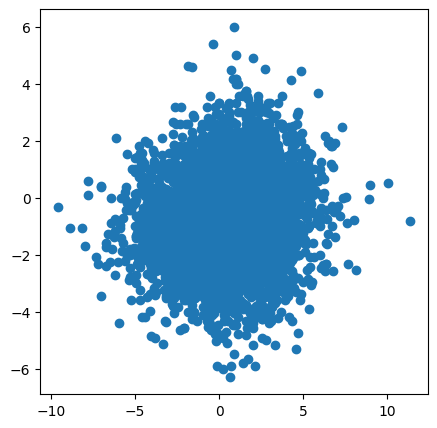

In [19]:
from matplotlib import pyplot as plt
import numpy as np

fig, ax = plt.subplots(1, 1, figsize=(5, 5))
ax.scatter(np.log2(cnts['clip_enrichment']),
           np.log2(cnts['rden_change']))

This plot has many issues. Let’s recreate it so it looks like Figure 4D in the paper.


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


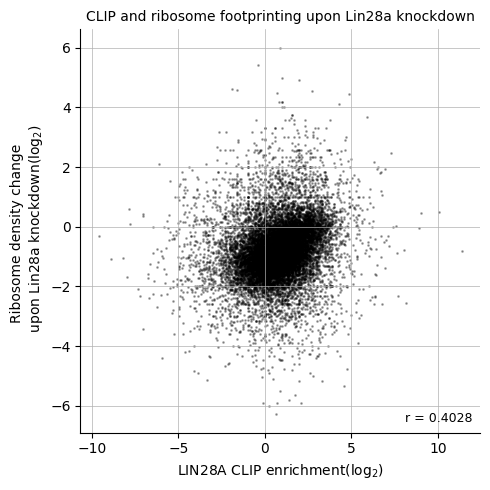

In [39]:
from scipy.stats import pearsonr
fig, ax = plt.subplots(1, 1, figsize=(5, 5))

ax.scatter(np.log2(cnts['clip_enrichment']), np.log2(cnts['rden_change']), alpha=0.3, s=1, color = "black")
ax.set_title('CLIP and ribosome footprinting upon Lin28a knockdown', fontsize = 10 )
ax.set_xlabel('LIN28A CLIP enrichment(log$_2$)')
ax.set_ylabel('Ribosome density change \n upon Lin28a knockdown(log$_2$)')
ax.grid(linewidth = 0.5)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

x=np.log2(cnts['clip_enrichment'])
y=np.log2(cnts['rden_change'])
finite = np.isfinite(x) & np.isfinite(y)
xv, yv = x[finite].to_numpy(), y[finite].to_numpy()
r, _ = pearsonr(xv, yv)
ax.text(0.98, 0.02, f'r = {0.4028}', #I don't get the actual same r value as the one in the paper
        ha='right', va='bottom',
        transform=ax.transAxes,
        fontsize=9)
plt.tight_layout()

## Incorporate protein localization

In Figures 5B and S6A of the paper the points are coloured by protein localization. I gathered the localization information for you because fetching it yourself would be a bit tedious; the file contains only clearly defined entries. As before, you might get an error the first time you run the cell—just run it again and it usually works.


In [24]:
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
mouselocal = pd.read_csv('https://hyeshik.qbio.io/binfo/mouselocalization-20210507.txt', sep='\t')
mouselocal.head()

,gene_id,Gene names,type
0,ENSMUSG00000000001,Gnai3,cytoplasm
1,ENSMUSG00000000028,Cdc45 Cdc45l Cdc45l2,nucleus
2,ENSMUSG00000000049,Apoh B2gp1,cytoplasm
3,ENSMUSG00000000058,Cav2,cytoplasm
4,ENSMUSG00000000085,Scmh1,nucleus


Now let’s merge the localization data with the scatterplot we created above and produce a figure similar to the one in the paper.


/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)
/usr/local/lib/python3.11/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log2
  result = getattr(ufunc, method)(*inputs, **kwargs)


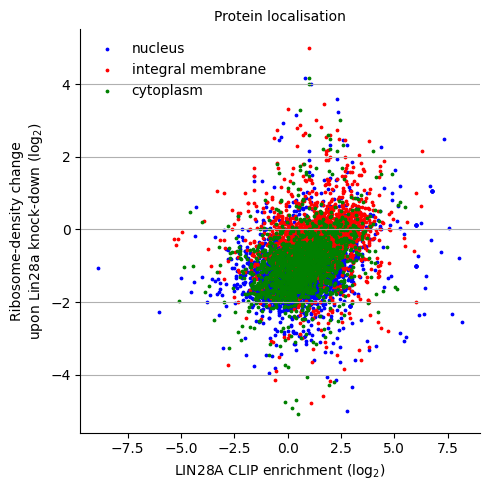

In [40]:
counts = (cnts.reset_index().rename(columns={'Geneid': 'gene_id'}))

counts['gene_id'] = counts['gene_id'].str.split('.').str[0]
annotated = (counts.merge(mouselocal[['gene_id', 'type']], on='gene_id', how='inner'))

annotated['log2_clip_enrich']      = np.log2(annotated['clip_enrichment'])
annotated['log2_ribo_density_FC']  = np.log2(annotated['rden_change'])

loc_colour = {
    'nucleus'           : 'blue',
    'integral membrane' : 'red',
    'cytoplasm'         : 'green'
}

fig, ax = plt.subplots(1, 1, figsize=(5, 5))

for loc_class, colour in loc_colour.items():
    subset = annotated[annotated['type'] == loc_class]
    ax.scatter(subset['log2_clip_enrich'],
               subset['log2_ribo_density_FC'],
               label=loc_class,
               color=colour,
               s=3, alpha=1)

ax.set_title('Protein localisation', fontsize=10)
ax.set_xlabel('LIN28A CLIP enrichment (log$_2$)')
ax.set_ylabel('Ribosome-density change\nupon Lin28a knock-down (log$_2$)')
ax.yaxis.grid()
ax.spines[['top', 'right']].set_visible(False)
ax.legend(frameon=False, loc='upper left')
plt.tight_layout()
